# Aprendizaje Automático - Práctica 3 - Ajuste de Modelos Lineales

# Problema de Clasificación

#### Valoración máxima: 6 puntos 

#### Fecha límite de entrega: 4 de Junio de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>Alejandro Nieto Alarcón</mark>



---

**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- Se espera que el código siempre lea de un directorio llamado 'drive/MyDrive/Colab Notebooks/datos/', situado dentro del directorio donde se desarrolla y ejecuta la práctica. No se admiten excepciones a esta ruta de acceso a los datos. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'>Este trabajo  se centra en el ajuste y selección del mejor predictor lineal para un conjunto de datos dado. Para ello, se recomienda el uso de la librería Scikit-Learn (https://scikit-learn.org/). Esta librería contiene funciones de alto nivel que pueden ser muy útiles para el desarrollo de la práctica. En cualquier caso, para cada función de Scikit-Learn que se use, debe explicar por qué es necesario su uso, así como explicar su funcionamiento y el significado de todos sus parámetros. En relación con este punto, los valores por defecto en la librería no se consideran elecciones justificadas $\textit{a priori}$ y, al igual que en el resto de la práctica, decisiones sin justificación y resultados sin interpretación no serán considerados válidos. 



In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import random
import pandas as pd

# Fijamos la semilla aleatoria
np.random.seed(1)

#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos. 

El problema que vamos a abordar en esta practica parte de un conjunto de datos utilizado para predecir la suscripción de pólizas de seguros de caravanas por parte de los clientes.
Los datos de los que partiremos serán una diversa gama de variables sociodemográficas derivadas de los codigos de postal y otras variables que involucran datos sobre los propietarios.
Las variables que tenemos las vamos a dividir en 3 conjuntos diferentes, las que empiezan por "M", las que empiezan por "P" y las que empiezan por "A".
Las variables que empiezan por "M" van de la 1-43 y son las variables sociodemográficas que tenemos. Las variables que empiezan por "P" y las que empiezan por "A" tienen el mismo nombre pero tienen un rango diferente en cuanto a ser variables categóricas. Las variables que empiezan por "P" se refieren a rangos de precios y las que empiezan por "A" se refieren a las pólizas de otros tipos de vehículos que tienen.

A continuación vamos a poner la información sobre las variables que nos da la propia página:

Nr Name Description Domain

1 MOSTYPE Customer Subtype see L0

2 MAANTHUI Number of houses 1 – 10

3 MGEMOMV Avg size household 1 – 6

4 MGEMLEEF Avg age see L1

5 MOSHOOFD Customer main type see L2

6 MGODRK Roman catholic see L3

7 MGODPR Protestant ...

8 MGODOV Other religion

9 MGODGE No religion

10 MRELGE Married

11 MRELSA Living together

12 MRELOV Other relation

13 MFALLEEN Singles

14 MFGEKIND Household without children

15 MFWEKIND Household with children

16 MOPLHOOG High level education

17 MOPLMIDD Medium level education

18 MOPLLAAG Lower level education

19 MBERHOOG High status

20 MBERZELF Entrepreneur

21 MBERBOER Farmer

22 MBERMIDD Middle management

23 MBERARBG Skilled labourers

24 MBERARBO Unskilled labourers

25 MSKA Social class A

26 MSKB1 Social class B1

27 MSKB2 Social class B2

28 MSKC Social class C

29 MSKD Social class D

30 MHHUUR Rented house

31 MHKOOP Home owners

32 MAUT1 1 car

33 MAUT2 2 cars

34 MAUT0 No car

35 MZFONDS National Health Service

36 MZPART Private health insurance

37 MINKM30 Income < 30.000

38 MINK3045 Income 30-45.000

39 MINK4575 Income 45-75.000

40 MINK7512 Income 75-122.000

41 MINK123M Income >123.000

42 MINKGEM Average income

43 MKOOPKLA Purchasing power class

44 PWAPART Contribution private third party insurance see L4

45 PWABEDR Contribution third party insurance (firms) ...

46 PWALAND Contribution third party insurane (agriculture)

47 PPERSAUT Contribution car policies

48 PBESAUT Contribution delivery van policies

49 PMOTSCO Contribution motorcycle/scooter policies

50 PVRAAUT Contribution lorry policies

51 PAANHANG Contribution trailer policies

52 PTRACTOR Contribution tractor policies

53 PWERKT Contribution agricultural machines policies 

54 PBROM Contribution moped policies

55 PLEVEN Contribution life insurances

56 PPERSONG Contribution private accident insurance policies

57 PGEZONG Contribution family accidents insurance policies

58 PWAOREG Contribution disability insurance policies

59 PBRAND Contribution fire policies

60 PZEILPL Contribution surfboard policies

61 PPLEZIER Contribution boat policies

62 PFIETS Contribution bicycle policies

63 PINBOED Contribution property insurance policies

64 PBYSTAND Contribution social security insurance policies

65 AWAPART Number of private third party insurance 1 - 12

66 AWABEDR Number of third party insurance (firms) ...

67 AWALAND Number of third party insurane (agriculture)

68 APERSAUT Number of car policies

69 ABESAUT Number of delivery van policies

70 AMOTSCO Number of motorcycle/scooter policies

71 AVRAAUT Number of lorry policies

72 AAANHANG Number of trailer policies

73 ATRACTOR Number of tractor policies

74 AWERKT Number of agricultural machines policies

75 ABROM Number of moped policies

76 ALEVEN Number of life insurances

77 APERSONG Number of private accident insurance policies

78 AGEZONG Number of family accidents insurance policies

79 AWAOREG Number of disability insurance policies

80 ABRAND Number of fire policies

81 AZEILPL Number of surfboard policies

82 APLEZIER Number of boat policies

83 AFIETS Number of bicycle policies

84 AINBOED Number of property insurance policies

85 ABYSTAND Number of social security insurance policies

86 CARAVAN Number of mobile home policies 0 - 1

L0:
	Value	Label
1	1	High Income, expensive child
2	2	Very Important Provincials
3	3	High status seniors
4	4	Affluent senior apartments
5	5	Mixed seniors
6	6	Career and childcare
7	7	Dinki's (double income no kids)
8	8	Middle class families
9	9	Modern, complete families
10	10	Stable family
11	11	Family starters
12	12	Affluent young families
13	13	Young all american family
14	14	Junior cosmopolitan
15	15	Senior cosmopolitans
16	16	Students in apartments
17	17	Fresh masters in the city
18	18	Single youth
19	19	Suburban youth
20	20	Etnically diverse
21	21	Young urban have-nots
22	22	Mixed apartment dwellers
23	23	Young and rising
24	24	Young, low educated 
25	25	Young seniors in the city
26	26	Own home elderly
27	27	Seniors in apartments
28	28	Residential elderly
29	29	Porchless seniors: no front yard
30	30	Religious elderly singles
31	31	Low income catholics
32	32	Mixed seniors
33	33	Lower class large families
34	34	Large family, employed child
35	35	Village families
36	36	Couples with teens 'Married with children'
37	37	Mixed small town dwellers
38	38	Traditional families
39	39	Large religous families
40	40	Large family farms
41	41	Mixed rurals

L1:

1 20-30 years

2 30-40 years

3 40-50 years

4 50-60 years

5 60-70 years

6 70-80 years

 

L2:

1 Successful hedonists

2 Driven Growers

3 Average Family

4 Career Loners

5 Living well

6 Cruising Seniors

7 Retired and Religeous

8 Family with grown ups

9 Conservative families

10 Farmers

 

L3:

0 0%

1 1 - 10%

2 11 - 23%

3 24 - 36%

4 37 - 49%

5 50 - 62%

6 63 - 75%

7 76 - 88%

8 89 - 99%

9 100%

 

L4:

0 f 0

1 f 1 – 49

2 f 50 – 99

3 f 100 – 199

4 f 200 – 499

5 f 500 – 999

6 f 1000 – 4999

7 f 5000 – 9999

8 f 10.000 - 19.999

9 f 20.000 - ?







Como podemos ver todas las variables son categóricas y todas tienen un dominio establecido dado por los distintos L0, L1... Cuando ponen puntos suspensivos en la variable de debajo de alguna que tiene un rango es para indicar que el resto que haya por debajo tendran el mismo hasta que haya una variable con otro rango de forma explícita.

In [31]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Como las variables no las tenemos definidas dentro del conjunto de datos que nos da el problema las he copiado a mano y he definido los distintos dominios con los que contamos

In [32]:
cols_names = [  'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND',
 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR',
 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND',
 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN']
 
values = np.arange(1,44)
L0 = []
for i in values:
  L0.append([i])

values = np.arange(1,7)
L1 = []
for i in values:
  L1.append([i])

values = np.arange(1,11)
L2 = []
for i in values:
  L2.append([i])

values = np.arange(0,10)
L3 = []
for i in values:
  L3.append([i])

values = np.arange(0,10)
L4 = []
for i in values:
  L4.append([i])

values = np.arange(1,13)
A_range = []
for i in values:
  A_range.append([i])





Aqui lo que hago es separar cada una de las variables en agrupaciones según el dominio que tienen, esto es para que después si aplicamos un onehotencoding o cualquier otra cosa, sepamos en el rango en el que actúa ya que podriamos dar lugar a que si no hacemos esto tengamos dominios diferentes tanto en testo como en train o que haya valores en un lado que no caigan en un lado por lo de que esta forma nos aseguramos

In [33]:
L0_variables = ['MOSTYPE'] 
L1_variables = ['MGEMLEEF', 'MGEMOMV'] #MGEMOMV esta aqui porque tiene el mismo rango el las variables L1
L2_variables = ['MOSHOOFD', 'MAANTHUI'] #MAANTHUI esta aqui porque tiene el mismo rango que las variables L2
L3_variables = ['MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND',
 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR',
 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA']
L4_variables = ['PWAPART', 'PWABEDR', 'PWALAND',
 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
 'PINBOED', 'PBYSTAND']
A_variables = ['AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG',
 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']

In [34]:
# Funcion para leer los datos
def readData(file_train, file_test, file_tags_test):
   
  dataTotal = []

  f = open(file_train, "r")
  Lines = f.readlines()
 
  for line in Lines:
      a =  line.split("\t")
      a[len(a) - 1] = a[len(a) - 1][:-1]
      a = np.array(a)
      dataTotal.append(a.astype(int))

  f1 = open(file_test, "r")
  f2 = open(file_tags_test, "r")
  Lines_test = f1.readlines()
  Lines_y = f2.readlines()
  for idx, line in enumerate(Lines_test):
      a =  line.split("\t")
      a[len(a) - 1] = a[len(a) - 1][:-1]
      a.append(int(Lines_y[idx][:-1]))
      a = np.array(a)
      dataTotal.append(a.astype(int))

  dataTotal = np.array(dataTotal)
  da = pd.DataFrame(dataTotal)

  columns_names = []
  for i in range(da.shape[1]):
    columns_names.append("X_" + str(i))
  columns_names[len(columns_names) - 1] = "Y"

  da.columns = columns_names
  
  return da

In [35]:
dataFrame = readData('drive/MyDrive/Colab Notebooks/datos/ticdata2000.txt','drive/MyDrive/Colab Notebooks/datos/ticeval2000.txt','drive/MyDrive/Colab Notebooks/datos/tictgts2000.txt')
dataFrame.columns = cols_names

A continuación podemos ver el conjunto de datos que forma parte de la X de nuestro problema que será con la parte con la que trabajaremos a la hora de intentar predecir las pólizas de caravanas que esta compuesto por todas las variables excepto por la objetivo.

In [36]:
# Los elementos X del problema seran los siguientes
dataFrame[dataFrame.columns[:-1]]

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,33,1,2,4,8,0,7,2,0,5,...,0,0,0,0,1,0,0,0,0,0
9818,24,1,2,3,5,1,5,1,3,4,...,1,0,0,0,1,0,0,0,0,0
9819,36,1,2,3,8,1,5,1,3,7,...,0,0,0,0,1,0,0,0,1,0
9820,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


Aquí podemos ver nuestra variable objetivo que es si el usuario tiene o no una póliza de seguros para caravanas, el rango de esta variable es binario [0,1]

In [37]:
#Los labels Y del problema seran los siguientes
dataFrame[dataFrame.columns[-1:]]

,CARAVAN
0,0
1,0
2,0
3,0
4,0
...,...
9817,0
9818,1
9819,0
9820,0


A continuación vemos si hay valores vacíos y el tipo de las características para cerciorarnos de que no hay valores nulos o no introducidos y el tipo de variables que tenemos que como podemos ver a continuación son todas valores int que nos da también pie a saber que son categóricas.



In [38]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   9822 non-null   int64
 1   MAANTHUI  9822 non-null   int64
 2   MGEMOMV   9822 non-null   int64
 3   MGEMLEEF  9822 non-null   int64
 4   MOSHOOFD  9822 non-null   int64
 5   MGODRK    9822 non-null   int64
 6   MGODPR    9822 non-null   int64
 7   MGODOV    9822 non-null   int64
 8   MGODGE    9822 non-null   int64
 9   MRELGE    9822 non-null   int64
 10  MRELSA    9822 non-null   int64
 11  MRELOV    9822 non-null   int64
 12  MFALLEEN  9822 non-null   int64
 13  MFGEKIND  9822 non-null   int64
 14  MFWEKIND  9822 non-null   int64
 15  MOPLHOOG  9822 non-null   int64
 16  MOPLMIDD  9822 non-null   int64
 17  MOPLLAAG  9822 non-null   int64
 18  MBERHOOG  9822 non-null   int64
 19  MBERZELF  9822 non-null   int64
 20  MBERBOER  9822 non-null   int64
 21  MBERMIDD  9822 non-null   int64
 22  

Como podemos ver en las variables que tenemos aquí no hay ningun dato faltante y todas son de tipo int, aún asi tenemos que tener cuidado porque aunque aparentemente todo pinta bastante bien puede que haya valores que se salgan de los distintos dominios especificados para cada una de las variables.

Antes de lo anterior vamos a ver la correlacion que existe entre las distintas variables del problema ya que en el caso de que hubiese etiquetas correladas podríamos optar por quitarlas y de esta manera restar ruido a nuestros datos

<ipython-input-39-fb1f71166e30>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<Axes: >

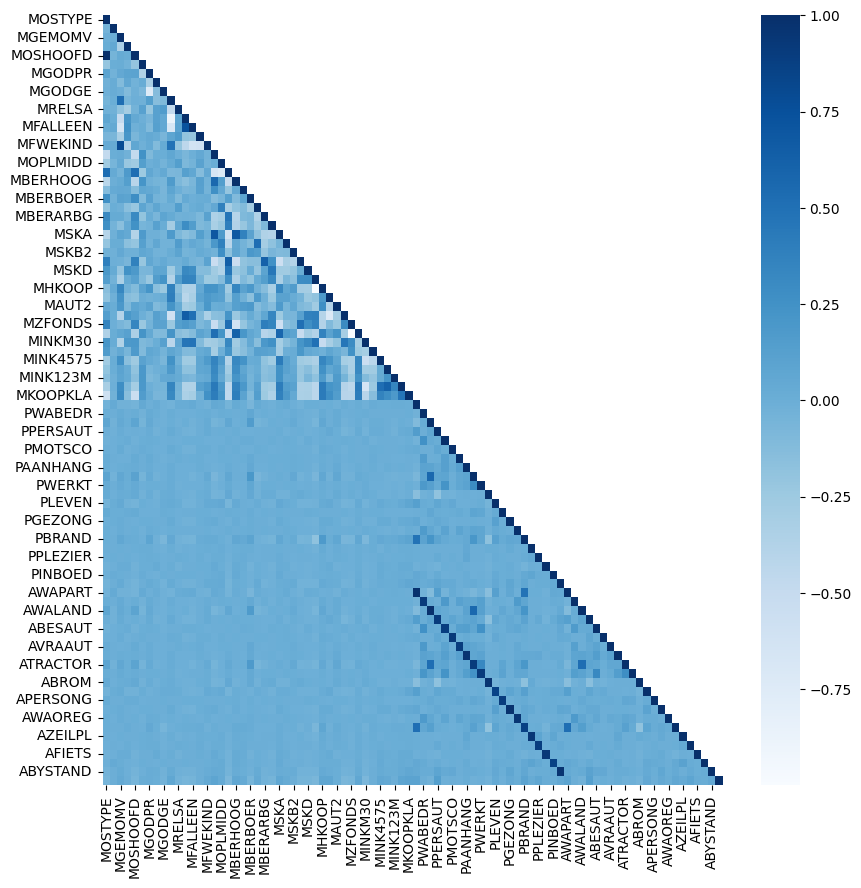

In [39]:
import seaborn as sns
cor=dataFrame.corr()
plt.figure(figsize=(10,10))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

Como podemos ver a partir de la matriz de correlacion vemos que las variables 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND' tienen una fuerte correlacion con esas mismas variables pero el nombre que comienza en lugar de A por P, podrían ser candidatas a ser eliminadas ya que no aportan ninguna información complementaria a la que nos dan las 'P'.

Yo en mi caso personal he optado por quitarlas debido a que el valor que puedo visualizar en la matriz de correlación es de 1, el máximo por lo que decido quitarlas del problema.

In [40]:
candidatas_eliminar = [ 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 
                       'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 
                       'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']
dataFrame = dataFrame.drop(candidatas_eliminar, axis = 1)

Para seguir con la exploracion de las variables vamos a ver en que distribución actuan y de esta forma poder visualizar si hay algo que se desajuste de la información que nos dan sobre las variables como entrada.

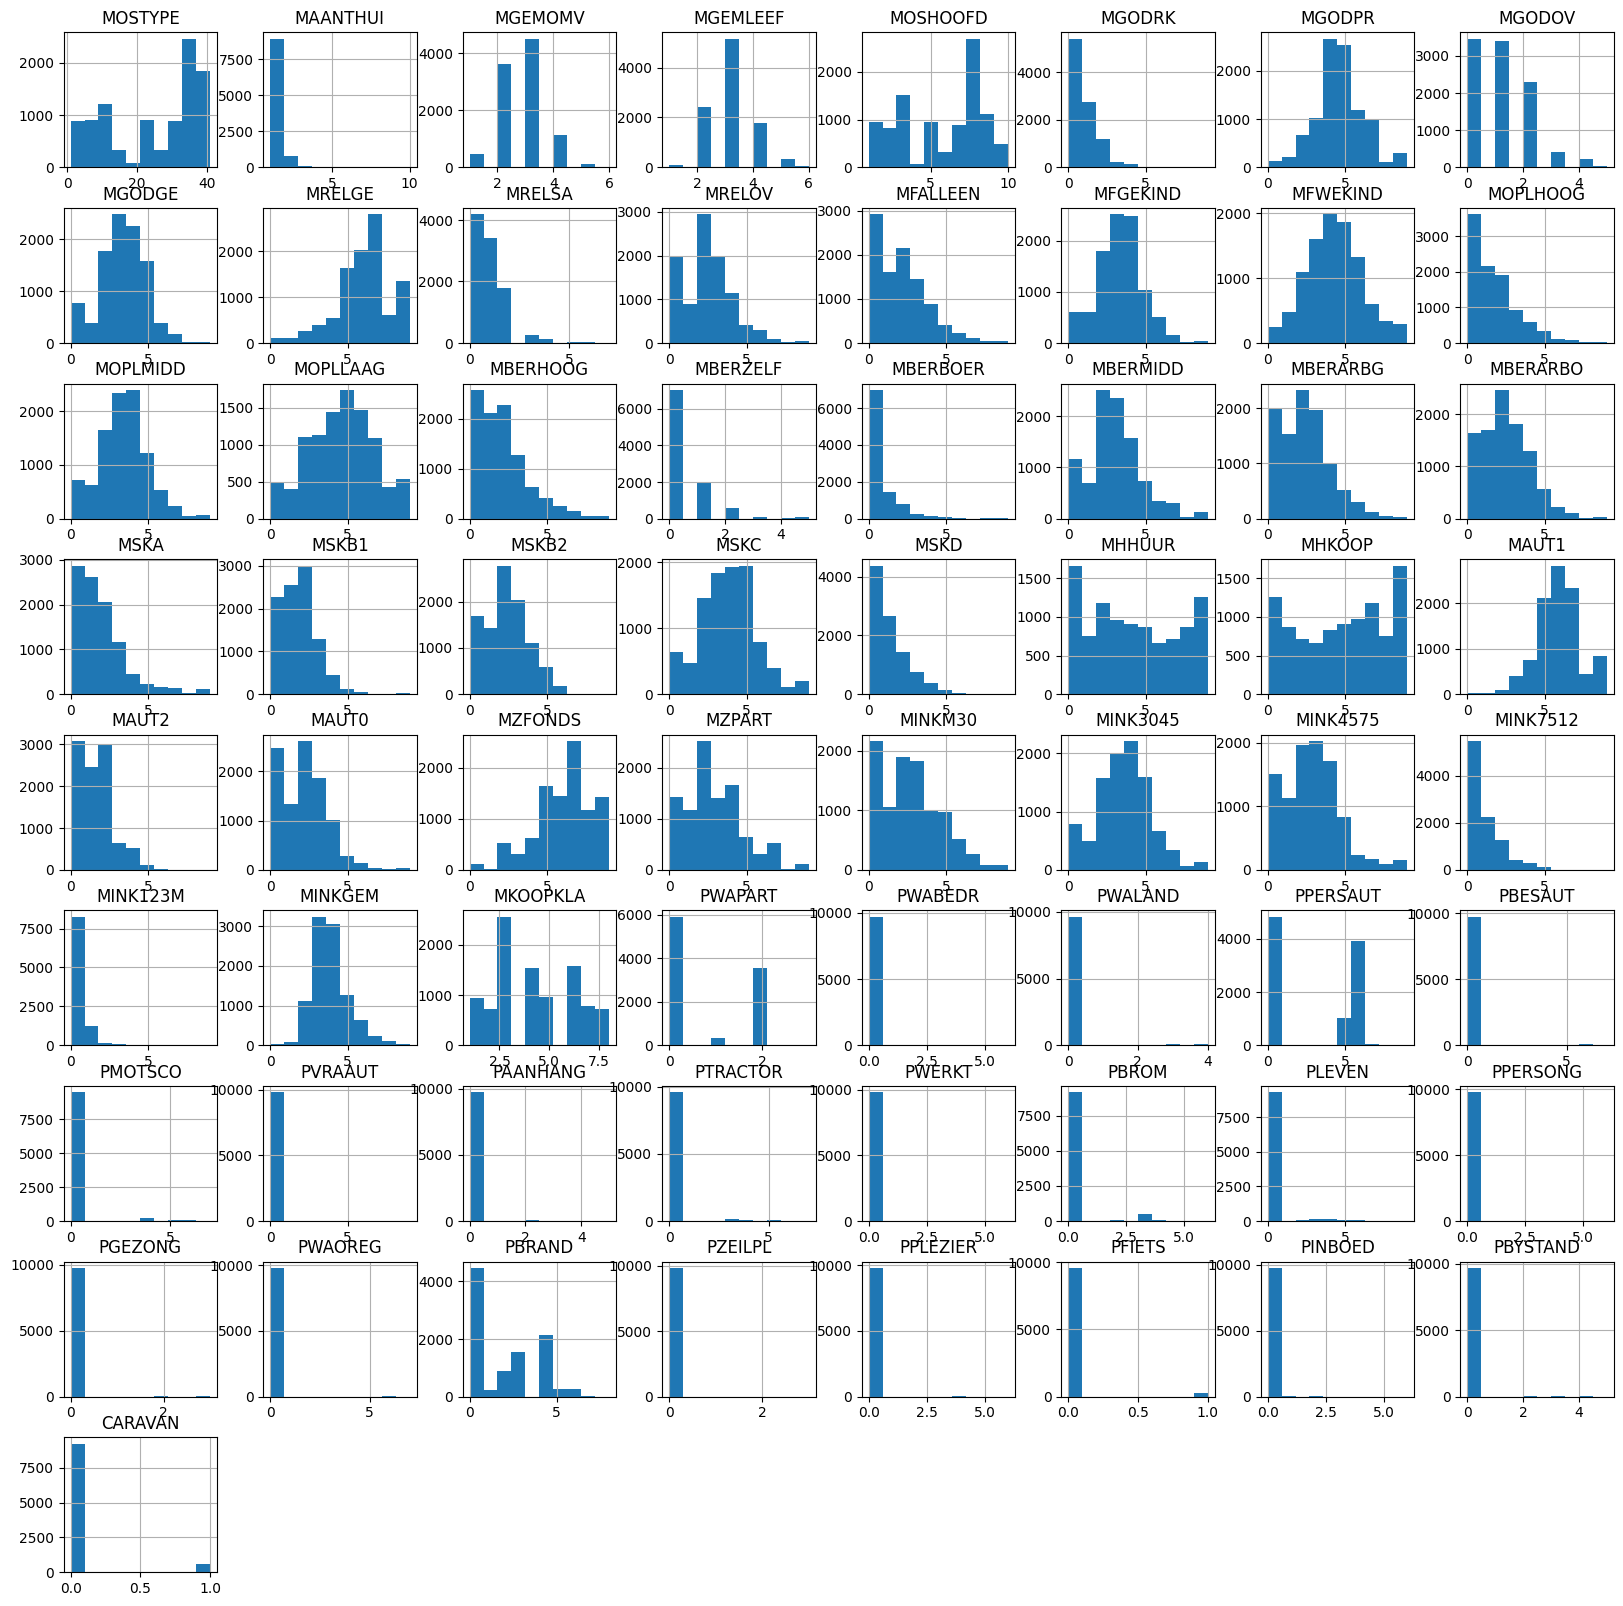

In [41]:
dataFrame.hist(figsize=(20,20))
plt.show()

La conclusión que saco a partir de visualizar las distribuciones de las distintas variables es que todo se encuentra aparentemente bien y no parece haber de momento nada raro, de igual forma en el preprocesado veremos si hay algo que no se ajusta con los variables.

Si pensamos en la naturaleza del problema y como lo presentan, creo que podría darse el caso de que este dataset se encuentre desbalanceado por ello voy a proceder a visualizar de cuantas variables existen por cada tipo para poder ver si el conjunto de datos positivos es muy inferior al de negativos.

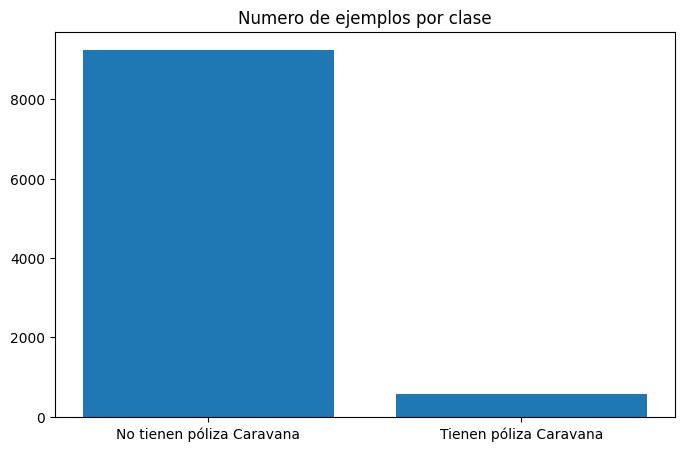

In [42]:
plt.figure(figsize=(8,5))
plt.bar([0, 1], [len(dataFrame.index[dataFrame[dataFrame.columns[-1]] == 0].tolist()), len(dataFrame.index[dataFrame[dataFrame.columns[-1]] == 1].tolist())], tick_label =  ['No tienen póliza Caravana', 'Tienen póliza Caravana'])
plt.title('Numero de ejemplos por clase')
plt.show()


#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos. 

Las razones por las que voy a coger estos modelos es la siguiente:

Perceptrón: El Perceptrón es un algoritmo de aprendizaje automático simple y rápido que se utiliza para problemas de clasificación binaria. Es particularmente útil cuando las clases son linealmente separables en el espacio de características. El Perceptrón se basa en la idea de ajustar un hiperplano que pueda separar las clases de manera óptima. Es fácil de implementar y computacionalmente eficiente.

Regresión Logística: La Regresión Logística es un algoritmo de clasificación que se utiliza para problemas de clasificación binaria y también se puede extender a problemas de clasificación multiclase. Aunque se llama "regresión", es en realidad un algoritmo de clasificación que estima la probabilidad de pertenencia a una clase determinada. La Regresión Logística utiliza una función sigmoide para modelar la probabilidad y se ajusta utilizando la técnica de máxima verosimilitud. Es flexible, interpretable y puede manejar tanto características lineales como no lineales.

SVM (Support Vector Machines): Los SVM son algoritmos de aprendizaje automático que se utilizan tanto para problemas de clasificación binaria como para problemas de clasificación multiclase. Los SVM buscan encontrar un hiperplano de separación óptimo que maximice el margen entre las clases. Pueden manejar características lineales y no lineales mediante el uso de funciones de kernel. Los SVM son especialmente útiles cuando las clases están bien separadas o cuando hay presencia de ruido o solapamiento en los datos

In [43]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos. 

Informandome y mirando veo que no hay una regla que diga que tamaño es mejor o peor para tomar dividir los datos en train y test pero lo que si he visto es que lo que más se hace es dividirlo en ratios de 80-20 y 70-30 que suelen ser los que mejor funcionan.

Aún así en numerosos articulos de machine learning se opta por una division de la siguiente forma para cross validation donde el 15% es el tamaño del test y el resto train 85% que a su vez cuando lo hagamos en una validacion cruzada tendremos un tamaño de test_val cercano al 15%. (85/5)

Para la division del conjunto de datos en train y test usaré la funcion de sklearn train_test_split que recibe en primer lugar lo que será nuestra X, después la Y, como parametro el test size para ver en que cantidad vamos a dividir el conjunto (en nuestro caso será 0.15 para que el test sea el 15%) y el random_state que será la semilla.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dataFrame[dataFrame.columns[:-1]], dataFrame[dataFrame.columns[-1]], test_size=0.15, random_state=42)

Como hemos hecho una division del conjunto de datos en train y test quiero ver si la división de los datos se ha hecho de una buena forma y han caído datos de tipo positivo también en el test y que en ambas particiones haya casos positivos.

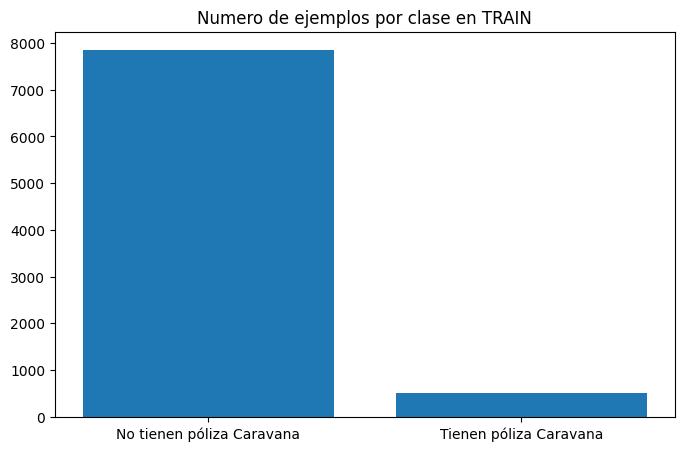

In [45]:
plt.figure(figsize=(8,5))
plt.bar([0, 1], [y_train.shape[0] - y_train.sum(), y_train.sum()], tick_label =  ['No tienen póliza Caravana', 'Tienen póliza Caravana'])
plt.title('Numero de ejemplos por clase en TRAIN')
plt.show()

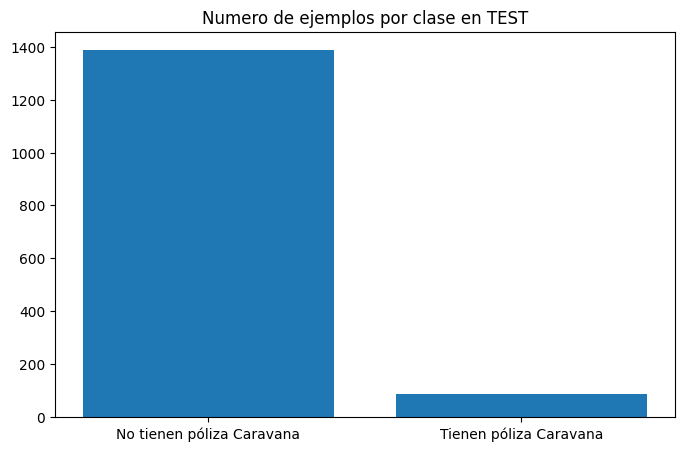

In [46]:
plt.figure(figsize=(8,5))
plt.bar([0, 1], [y_test.shape[0] - y_test.sum(), y_test.sum()], tick_label =  ['No tienen póliza Caravana', 'Tienen póliza Caravana'])
plt.title('Numero de ejemplos por clase en TEST')
plt.show()

In [47]:
print("Total de ejemplos positivos en train", y_train.sum())
print("Total de ejemplos negativos en train", len(y_train) - y_train.sum())
print("Total de ejemplos positivos en test",  y_test.sum())
print("Total de ejemplos negativos en test", len(y_test) - y_test.sum())

Total de ejemplos positivos en train 500
Total de ejemplos negativos en train 7848
Total de ejemplos positivos en test 86
Total de ejemplos negativos en test 1388


Una vez partidos los conjuntos y con datos positivos en ambos lo que haremos será sencillamente usar cross validation para ver el desempeño de los modelos elegidos. El uso justificado de usar cross validation es por lo siguiente:

En primer lugar nos brinda una estimación más precisa del rendimiento del modelo, la validación cruzada permite obtener una estimación más precisa del rendimiento del modelo al evaluarlo en múltiples divisiones diferentes del conjunto de datos. En lugar de depender de una única división de entrenamiento/prueba, la validación cruzada divide el conjunto de datos en k partes (k-folds) y realiza k iteraciones, utilizando cada parte como conjunto de prueba una vez y el resto como conjunto de entrenamiento. Esto ayuda a reducir la variabilidad de la estimación del rendimiento y proporciona una evaluación más robusta y confiable del modelo.

Además nos ayuda con la detección de sobreajuste (overfitting). La validación cruzada ayuda a identificar si un modelo está sobreajustando o subajustando los datos. Si el modelo tiene un rendimiento alto en el conjunto de entrenamiento pero un rendimiento deficiente en el conjunto de prueba, esto puede ser indicativo de sobreajuste. La validación cruzada permite detectar estos problemas de generalización temprano y tomar medidas para abordarlos, como ajustar los hiperparámetros del modelo o utilizar técnicas de regularización.

También sirve para ayudarnos a la hora de la selección de modelos y su comparación debido a que la validación cruzada permite comparar diferentes modelos y seleccionar el más adecuado para el problema en cuestión. Al realizar la validación cruzada en varios modelos con diferentes configuraciones o algoritmos, se puede comparar su rendimiento de manera más justa y objetiva. Esto ayuda a tomar decisiones informadas sobre qué modelo utilizar y cómo ajustarlo para obtener mejores resultados.

En este tipo de problemas al estar desbalanceado para partir cada uno de los folds de la validación cruzada usaremos la función de sklearn StratifiedKFold que lo que hará sencillamente es mantener la misma proporción de muestras positivas y negativas en cada fold. De esta manera tendremos casos positivos en todos los los folds.

#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.  

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas. 

Lo que hago a continuación es aplicar one hot encoding a cada una de las columnas que tenemos ya que todas son categóricas pero lo hago entrenando el encoder con el dominio de la variable que ya definí al principio. Esto es para que si por ejemplo en la variable 'MOSTYPE' que tiene un dominio de 1-43 en train da la casualidad que no tiene valores supongamos a partir del 35 y solo tenemos datos que estén de 1-35 ya no estaríamos definiendo el dominio por completo y por ende podriamos tener problemas a la hora de probar el test ya que este podria contener variables con valor en el rango que no estan en train.

Otro ejemplo del por qué hago esto es para si por ejemplo en la variable que he mencionado anteriormente en train caen valores de 1-35 y en test de 35 a 43 ya haríamos que el encoder no nos pusiese el mismo número de columnas y por lo tanto tendrían test y train distinta dimension.

Tambien hacerlo por el rango predefinido y de esta forma hace que si hay valores que no están dentro del dominio fallaría, ya que si esta entrenado para poner 43 columnas y encuentra valores 44 valores va a dar un error y ya podriamos tener en cuenta que hay outliers dentro de nuestro dataset, mientras que si aplicasemos el encoder a toda la columna sin mirar y tuviese valores fuera del rango tambien crearía una nueva columna para ella.

In [48]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(L0)
X_train_L0 = pd.DataFrame()
X_test_L0 = pd.DataFrame()
L0_variables_new_cols = []
for column in L0_variables:
  for i in range(len(L0)):
    L0_variables_new_cols.append(column + "_" + str(i + 1))
  X_train_L0 = pd.concat([X_train_L0, pd.DataFrame(enc.transform(X_train.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1) 
  X_test_L0 = pd.concat([X_test_L0, pd.DataFrame(enc.transform(X_test.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1) 

X_train_L0.columns = L0_variables_new_cols
X_train_L0 = X_train_L0.reset_index(drop = True)
X_train = X_train.drop(L0_variables, axis = 1)

X_test_L0.columns = L0_variables_new_cols
X_test_L0 = X_test_L0.reset_index(drop = True)
X_test = X_test.drop(L0_variables, axis = 1)

enc.fit(L1)
X_train_L1 = pd.DataFrame()
X_test_L1 = pd.DataFrame()
L1_variables_new_cols = []
for column in L1_variables:
  for i in range(len(L1)):
    L1_variables_new_cols.append(column + "_" + str(i + 1))
  X_train_L1 = pd.concat([X_train_L1, pd.DataFrame(enc.transform(X_train.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1)
  X_test_L1 = pd.concat([X_test_L1, pd.DataFrame(enc.transform(X_test.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1)
X_train_L1.columns = L1_variables_new_cols
X_train_L1 = X_train_L1.reset_index(drop = True)
X_train = X_train.drop(L1_variables, axis = 1)
X_test_L1.columns = L1_variables_new_cols
X_test_L1 = X_test_L1.reset_index(drop = True)
X_test = X_test.drop(L1_variables, axis = 1)

enc.fit(L2)
X_train_L2 = pd.DataFrame()
X_test_L2 = pd.DataFrame()
L2_variables_new_cols = []
for column in L2_variables:
  for i in range(len(L2)):
    L2_variables_new_cols.append(column + "_" + str(i + 1))
  X_train_L2 = pd.concat([X_train_L2, pd.DataFrame(enc.transform(X_train.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1)
  X_test_L2 = pd.concat([X_test_L2, pd.DataFrame(enc.transform(X_test.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1)

X_train_L2.columns = L2_variables_new_cols
X_train_L2 = X_train_L2.reset_index(drop = True)
X_train = X_train.drop(L2_variables, axis = 1)
X_test_L2.columns = L2_variables_new_cols
X_test_L2 = X_test_L2.reset_index(drop = True)
X_test = X_test.drop(L2_variables, axis = 1)

enc.fit(L3)
X_train_L3 = pd.DataFrame()
X_test_L3 = pd.DataFrame()
L3_variables_new_cols = []
for column in L3_variables:
  for i in range(len(L3)):
    L3_variables_new_cols.append(column + "_" + str(i + 1))
  X_train_L3 = pd.concat([X_train_L3, pd.DataFrame(enc.transform(X_train.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1)
  X_test_L3 = pd.concat([X_test_L3, pd.DataFrame(enc.transform(X_test.loc[:,column].values.reshape(-1,1)).toarray())], axis = 1)
X_train_L3.columns = L3_variables_new_cols
X_train_L3 = X_train_L3.reset_index(drop = True)
X_train = X_train.drop(L3_variables, axis = 1)
X_test_L3.columns = L3_variables_new_cols
X_test_L3 = X_test_L3.reset_index(drop = True)
X_test = X_test.drop(L3_variables, axis = 1)


X_train = pd.concat([X_train_L0, X_train_L1, X_train_L2, X_train_L3], axis = 1)
X_test = pd.concat([X_test_L0, X_test_L1, X_test_L2, X_test_L3], axis = 1)



In [49]:
X_train.shape

(8348, 455)

Como podemos comprobar funciona perfectamente sin ningún tipo de problema por lo que podemos quedarnos tranquilos en cuanto a la presencia de valores fuera de rango. Una vez hecho esto y ya habiendo visto que no hay datos faltantes podemos proceder a realizar las distintas transformaciones sobre el conjunto de entrenamiento.

Debemos mencionar tambien que no hay datos faltantes como ya hemos comprobado al principio y que todas las variables son variables como vimos también a la hora de hacer el gráfico de las distribuciones.

Con esto quiero decir que no hay datos faltantes y que no hay variables sin variabilidad en el conjunto.

Debido a que tenemos ahora un conjunto de datos conformado por todo variables binarias tras aplicar one hot encoding no podemos reducir la dimensionalidad usando FactorAnalysis o PCA ya que estas no se aplican sobre las variables binarias.

La razón principal por la que no se aplica PCA (Análisis de Componentes Principales) y FactorAnalysis sobre variables binarias es que estas técnicas asumen que las variables tienen una distribución continua o al menos una estructura de correlación lineal. Sin embargo, las variables binarias solo toman dos valores posibles (por ejemplo, 0 o 1) y no tienen una relación lineal o continua entre ellos.

Además, PCA y FactorAnalysis se basan en medidas estadísticas como la covarianza o la matriz de correlación para calcular los componentes principales o los factores latentes. Estas medidas no son apropiadas para variables binarias, ya que no tienen una variabilidad continua y no pueden ser interpretadas de la misma manera que las variables continuas.

Ahora lo que vamos a utilizar es la funcion SMOTE para realizar un oversampling de la variable minoritaria en nuestro conjunto de entrenamiento ya que es muy dificil entrenar con un conjunto tan disparejo. Podemos hacerlo aún así de dos formas o aumentando la penalización sobre la muestra minoritaria que sería mas elegando debido a que no cambiamos los datos o haciendo un oversampling.

De igual forma vamos a experimentar con los dos casos para ver como responden los modelos.

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos. 


Accuracy (Precisión):
La precisión es una métrica común utilizada en problemas de clasificación para evaluar el rendimiento general del modelo. Mide la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo. Es calculada dividiendo el número de predicciones correctas por el número total de predicciones. Una puntuación de precisión alta indica un modelo que realiza un buen trabajo en la clasificación correcta de las muestras.

F1-Score:
El F1-Score es una medida de la precisión y recall combinadas. Combina la precisión y el recall en una sola métrica para proporcionar una evaluación más completa del rendimiento del modelo. El F1-Score es útil cuando hay un desequilibrio entre las clases en el conjunto de datos. Se calcula a partir de la fórmula: 2 * (precision * recall) / (precision + recall). Un F1-Score alto indica un modelo que tiene un equilibrio entre la precisión y el recall en la clasificación.

ROC (Receiver Operating Characteristic):
La curva ROC es una representación gráfica que muestra el rendimiento del modelo para diferentes umbrales de clasificación. Es comúnmente utilizada en problemas de clasificación binaria. La curva ROC muestra la tasa de verdaderos positivos (sensibilidad) en función de la tasa de falsos positivos (1 - especificidad). Cuanto más cerca esté la curva ROC de la esquina superior izquierda del gráfico, mejor será el rendimiento del modelo. El área bajo la curva ROC (AUC-ROC) también se utiliza como métrica. Un AUC-ROC alto indica un modelo que puede distinguir eficazmente entre las clases positiva y negativa.

Estas métricas son ampliamente utilizadas para evaluar el rendimiento de modelos de clasificación en función de su capacidad para predecir correctamente las clases. La elección de la métrica más adecuada depende del contexto del problema y de los objetivos específicos del análisis.


En cuanto a las funciones de perdida utilizadas en el Perceptrón, Regresión Logística y SVM (Support Vector Machines) son las siguientes:

Perceptrón:
El Perceptrón utiliza una función de pérdida llamada "pérdida de clasificación errónea" o "hinge loss". La pérdida de clasificación errónea penaliza los errores de clasificación asignando un valor de pérdida positivo cuando se clasifica incorrectamente un ejemplo y un valor de pérdida cero cuando se clasifica correctamente. El objetivo del Perceptrón es minimizar la suma de estas pérdidas de clasificación errónea.

Regresión Logística:
La Regresión Logística utiliza una función de pérdida llamada "entropía cruzada binaria" (binary cross-entropy) o "log loss". Esta función de pérdida mide la discrepancia entre las probabilidades predichas por el modelo y las etiquetas reales. Penaliza las predicciones incorrectas y busca minimizar la discrepancia entre las probabilidades predichas y las etiquetas verdaderas.

SVM (Support Vector Machines):
Los SVM utilizan una función de pérdida llamada "hinge loss". La función de pérdida hinge es similar a la utilizada por el Perceptrón. Penaliza los errores de clasificación y busca maximizar el margen entre las muestras de diferentes clases. El objetivo del SVM es encontrar el hiperplano que maximice el margen y minimice la suma de las pérdidas hinge.

En resumen, el Perceptrón y SVM utilizan la pérdida de clasificación errónea (hinge loss), mientras que la Regresión Logística utiliza la entropía cruzada binaria (log loss) como función de pérdida. Estas funciones de pérdida se utilizan para guiar la optimización del modelo y ajustar los parámetros de manera que se minimice la discrepancia entre las predicciones del modelo y las etiquetas verdaderas.




#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto. 

In [51]:
# METODO PARA LA CROSS VALIDATION HECHO POR MI MISMO
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score as F1
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import roc_auc_score as ROC
from sklearn.metrics import confusion_matrix

import math

def own_cv(X_train, y_train, model, show_outputs):
  index = 1
  msas_trs = []
  mses_trs = []
  msas_tes = []
  mses_tes = []
  r2_trs = []
  r2_tes = []
  
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  for train_index, test_index in skf.split(X_train, y_train):
      x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
      y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
      if model[0] not in "BAY ":
        model[1].fit(x_train_fold, y_train_fold)

        msas_trs.append(ACC(y_train_fold, model[1].predict(x_train_fold)))
        mses_trs.append(F1(y_train_fold, model[1].predict(x_train_fold)))
        r2_trs.append(ROC(y_train_fold, model[1].predict(x_train_fold)))

        msas_tes.append(ACC(y_test_fold, model[1].predict(x_test_fold)))
        mses_tes.append(F1(y_test_fold, model[1].predict(x_test_fold)))
        r2_tes.append(ROC(y_test_fold, model[1].predict(x_test_fold)))

        if show_outputs == True:
          print(confusion_matrix(y_test_fold, model[1].predict(x_test_fold)))

      index += 1
  
  if show_outputs == True:
    print("ACCURACY TRAIN: ", np.array(msas_trs).mean())
    print("F1 TRAIN: ", np.array(mses_trs).mean())
    print("ROC TRAIN: ", np.array(r2_trs).mean())
    print("ACCURACY TEST: ", np.array(msas_tes).mean())
    print("F1 TEST: ", np.array(mses_tes).mean())
    print("ROC TEST: ", np.array(r2_tes).mean())
    
  return msas_trs, mses_trs, r2_trs, msas_tes, mses_tes, r2_tes

In [52]:
import matplotlib.pyplot as plt

def plot_performance(df_metrics, name):
  x = np.arange(df_metrics.shape[0])  # the label locations
  width = 0.2  # the width of the bars
  multiplier = 0

  dict_metrics = df_metrics.to_dict('list')

  fig, ax = plt.subplots(figsize=(8,6))

  for attribute, measurement in dict_metrics.items():
      #print(attribute, "-"+measurement+"-")
      offset = width * multiplier
      rects = ax.bar(x + offset, np.round(np.array(measurement),2), width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Value')
  ax.set_title('Performance in ' + name)
  ax.set_xticks(x + width * 1.5, df_metrics.index)
  ax.legend(loc='upper left', ncols=3)
  ax.set_ylim([0, 1.2])

  plt.show()

Perceptrón: los parámetros que usamos par este modelo son los siguientes:
1. Tol:  El parámetro tol establece el umbral de tolerancia para la diferencia en el error entre iteraciones consecutivas. Si la diferencia en el error es menor que tol, se considera que el modelo ha convergido y el entrenamiento se detiene.
2. Class_weight: Se utiliza para ajustar automáticamente los pesos de las clases durante el entrenamiento. Esto es especialmente útil en problemas de clasificación binaria cuando hay un desequilibrio significativo en la distribución de las clases.
Esto permite que el modelo preste más atención y dé más importancia a la clase minoritaria durante el entrenamiento, lo que puede ayudar a mejorar la capacidad del modelo para detectar y clasificar correctamente los ejemplos de la clase minoritaria. Esto es especialmente útil cuando la clase minoritaria es de interés principal y es importante reducir los errores de clasificación de esa clase.
3. Alpha: es la constante que multiplica el termino de regularización por lo que cuanto más grande es mayor es el termino de regularización que se aplica.
4. Penalty (default = None): se utiliza para especificar la función de regularización a aplicar durante la optimización del modelo.

Parámetros por defecto del perceptron:
1. l1_ratio (default 0.15): es un valor que controla la combinación entre las regularizaciones L1 (valor absoluto) y L2 (cuadrado).
2. fit_intercept (default True): especifica si se debe calcular o no la intersección en el modelo.
3. Max_iter (default 1000): número máximo de iteraciones que realiza el modelo antes de parar.
4. shuffle (default True): Este parámetro controla si se deben mezclar los datos en cada iteración durante el entrenamiento.
5. verbose (defaut 0): controla el nivel de detalle de los mensajes de progreso durante el entrenamiento. Un valor mayor que 0 imprimirá mensajes más detallados, mientras que 0 no imprimirá ningún mensaje durante el entrenamiento.
6. eta0 (default 1): es la tasa de aprendizaje inicial. Es la constante por la que se multiplican las actualizaciones.
7. n_jobs (default None): El número de trabajos a utilizar para el cálculo. Esto solo proporcionará una aceleración en caso de problemas lo suficientemente grandes.
8. early_stopping (default False): controla si se debe utilizar la detención anticipada (early stopping).
9. validation_fraction (default 0.1): parámetro especifica la proporción de datos que se utilizarán como conjunto de validación si se habilita early_stopping.
10. n_iter_no_change (default 5): especifica el número máximo de iteraciones consecutivas sin mejora en la función de pérdida en el conjunto de validación antes de que se detenga.
11. warm_start (default False): controla si se deben reutilizar los coeficientes anteriores como punto de partida para el siguiente fit llamado. Si se establece en True, permite un entrenamiento incremental del modelo.

Regresión logistica: los parámetros que usamos par este modelo son los siguientes:
1. Tol:  El parámetro tol establece el umbral de tolerancia para la diferencia en el error entre iteraciones consecutivas. Si la diferencia en el error es menor que tol, se considera que el modelo ha convergido y el entrenamiento se detiene.
2. Class_weight: Se utiliza para ajustar automáticamente los pesos de las clases durante el entrenamiento. Esto es especialmente útil en problemas de clasificación binaria cuando hay un desequilibrio significativo en la distribución de las clases.
Esto permite que el modelo preste más atención y dé más importancia a la clase minoritaria durante el entrenamiento, lo que puede ayudar a mejorar la capacidad del modelo para detectar y clasificar correctamente los ejemplos de la clase minoritaria. Esto es especialmente útil cuando la clase minoritaria es de interés principal y es importante reducir los errores de clasificación de esa clase.
3. Penalty: Se utiliza para especificar el tipo de regularización aplicada al modelo. La regularización es una técnica que se utiliza para evitar el sobreajuste al penalizar los coeficientes grandes en la función de pérdida durante el entrenamiento del modelo. 
En nuestro caso usaremos 'L2' que agrega una penalización proporcional al cuadrado de los coeficientes, lo que reduce los valores de los coeficientes sin necesariamente eliminarlos completamente.
4. C: Se utiliza para controlar la regularización del modelo. Es el inverso de la fortaleza de la regularización, por lo que un valor más pequeño de C indica una regularización más fuerte, mientras que un valor más grande de C indica una regularización más débil.
5. Max_iter: es el número de iteraciones máximas que realizará nuestro modelo antes de parar.

Parámetros no modificados en Regresión Logistica:
1. dual (default False):  el parámetro dual se utiliza para controlar la forma en que se resuelve el problema. Esta formulación es útil cuando el número de características (variables predictoras) es mayor que el número de muestras. Resolver la formulación dual puede ser más eficiente en estos casos.
2. fit_intercept (default True): especifica si se debe calcular o no la intersección en el modelo.
3. intercept_scaling (default 1): controla la importancia relativa del término de intersección en la regresión logística y ajusta su influencia en el modelo. 
4. solver (default lbfgs): se utiliza para especificar el algoritmo de optimización utilizado para encontrar los coeficientes óptimos del modelo. "lbfgs": utiliza el algoritmo de optimización Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS), que es eficiente en conjuntos de datos grandes. También es compatible con la regularización L2.
5. multi_class (default auto): se utiliza para especificar cómo manejar problemas de clasificación con más de dos clases.
6. verbose (default 0): controla el nivel de detalle de los mensajes de progreso durante el entrenamiento. Un valor mayor que 0 imprimirá mensajes más detallados, mientras que 0 no imprimirá ningún mensaje durante el entrenamiento.
7. warm_start (default False): controla si se deben reutilizar los coeficientes anteriores como punto de partida para el siguiente fit llamado. Si se establece en True, permite un entrenamiento incremental del modelo.
8. n_jobs (default None): El número de trabajos a utilizar para el cálculo. Esto solo proporcionará una aceleración en caso de problemas lo suficientemente grandes.
9. l1_ratio (defafult None): es un valor que controla la combinación entre las regularizaciones L1 (valor absoluto) y L2 (cuadrado).

SVM Lineal: los parámetros que usamos par este modelo son los siguientes:
1. Kernel: Un kernel es una función matemática que se utiliza para transformar los datos de entrada en un espacio de mayor dimensionalidad, lo que permite encontrar un hiperplano de separación óptimo entre las clases en ese espacio. En el caso del kernel lineal, no hay una transformación no lineal de los datos y el algoritmo SVM se aplica directamente en el espacio de características original.
2. Class_weight: Se utiliza para ajustar automáticamente los pesos de las clases durante el entrenamiento. Esto es especialmente útil en problemas de clasificación binaria cuando hay un desequilibrio significativo en la distribución de las clases.
Esto permite que el modelo preste más atención y dé más importancia a la clase minoritaria durante el entrenamiento, lo que puede ayudar a mejorar la capacidad del modelo para detectar y clasificar correctamente los ejemplos de la clase minoritaria. Esto es especialmente útil cuando la clase minoritaria es de interés principal y es importante reducir los errores de clasificación de esa clase.
3. Tol: El parámetro tol establece el umbral de tolerancia para la diferencia en el error entre iteraciones consecutivas. Si la diferencia en el error es menor que tol, se considera que el modelo ha convergido y el entrenamiento se detiene.
4. Max_iter: es el número de iteraciones máximas que realizará nuestro modelo antes de parar.

SVM No lineal: los parámetros que usamos par este modelo son los mismos que el lineal solo que cambia el kernel
1. Kernel: El kernel RBF transforma los datos de entrada en un espacio de características de dimensionalidad superior utilizando una función de base radial.
La función de base radial utiliza una medida de distancia, como la distancia euclidiana, para asignar un valor a cada par de puntos de datos. Los puntos cercanos en el espacio de entrada tendrán valores altos y los puntos alejados tendrán valores bajos. Esto permite que el SVM encuentre una superficie de decisión no lineal en el espacio de características que puede separar las clases de manera más efectiva.

Parámetros no modificados en SVM:
1. C (default 1.0): parámetro de regularización que controla el equilibrio entre lograr un margen amplio y clasificar correctamente los puntos de datos de entrenamiento. 
2. degree (default 3): grado del kernel polinomial utilizado en el SVM. 
3. gamma (default scale): parámetro de ajuste del kernel utilizado en el SVM. Controla la influencia de cada punto de entrenamiento en la formación del límite de decisión.
4. coef0 (default 0.0): es un parámetro adicional para los kernels polinomiales y sigmoidales. Afecta el comportamiento de estos kernels.
5. shrinking (default True): booleano que indica si se debe utilizar la heurística de reducción de la cantidad de vectores de soporte para acelerar el entrenamiento.
6. probability (default False): parámetro booleano que indica si se deben calcular las probabilidades de clase a partir de las distancias de los puntos al hiperplano.
7. cache_size (default 200): tamaño del caché en memoria (en MB) utilizado para almacenar información intermedia. 
8. verbose (default False): booleano que indica si se deben imprimir mensajes detallados durante el entrenamiento.
9. decision_funtion_shape (default ovr): especifica cómo se deben devolver las funciones de decisión en un problema multiclase
10. break_ties (default False): es un booleano que indica si se deben romper los empates en la decisión de la clase.


Cabe destacar que el parámetro class_weight solo lo usaremos cuando estén los datos desbalanceados mientras que no hace falta si estamos con los datos a los que hemos aplicado SMOTE

La utilización de un svm no lineal simplemente es por ver la comparación con el resto. No se va a usar en el resto de la práctica como modelo.

In [53]:
#Hacemos un cross val para la busqueda de hyper parametros y elegimos un modelo
def do_cv_and_plot_metrics(X_train, y_train, balanced = 0, show_outputs = False):
  df_msas_tr = pd.DataFrame()
  df_mses_tr = pd.DataFrame()
  df_r2_tr = pd.DataFrame()

  df_msas_te = pd.DataFrame()
  df_mses_te = pd.DataFrame()
  df_r2_te = pd.DataFrame()

  models = []

  if balanced == 0:
    models.append(['PERCEPTRON ', Perceptron(penalty = 'l2', tol=1e-3, class_weight='balanced', random_state=0, alpha = 0.01)]) 
    models.append(['RL ', LogisticRegression(tol=1e-3, class_weight='balanced', random_state= 0, penalty = 'l2', C = 0.1,  max_iter = 1000)]) 
    models.append(['SVM linear', SVC(kernel = 'linear', class_weight='balanced', tol=1e-3,  random_state=0, max_iter = 500)]) 
    models.append(['SVM rbf', SVC(tol=1e-3, class_weight='balanced', random_state=0, max_iter = 500)]) 
  else:
    models.append(['PERCEPTRON ', Perceptron(penalty = 'l2', tol=1e-3,  random_state=0, alpha = 0.01)]) 
    models.append(['RL ', LogisticRegression(tol=1e-3, random_state= 0, penalty = 'l2', C = 1,  max_iter = 1000)]) 
    models.append(['SVM linear', SVC(kernel = 'linear', tol=1e-3,  random_state=0, max_iter = 500)]) 
    models.append(['SVM rbf', SVC(tol=1e-3,  random_state=0, max_iter = 500)]) 

  for model in models:
    print("************ ", model[0], " ************")
    scores_msa_tr, scores_mse_tr, scores_r2_tr, score_msa_tes, scores_mse_tes, scores_r2_tes = own_cv(X_train, y_train, model, show_outputs)

    df_msas_tr = pd.concat([df_msas_tr, pd.DataFrame(scores_msa_tr)], axis = 1)
    df_mses_tr = pd.concat([df_mses_tr, pd.DataFrame(scores_mse_tr)], axis = 1)
    df_r2_tr = pd.concat([df_r2_tr, pd.DataFrame(scores_r2_tr)], axis = 1)

    df_msas_te = pd.concat([df_msas_te, pd.DataFrame(score_msa_tes)], axis = 1)
    df_mses_te = pd.concat([df_mses_te, pd.DataFrame(scores_mse_tes)], axis = 1)
    df_r2_te = pd.concat([df_r2_te, pd.DataFrame(scores_r2_tes)], axis = 1)

    print()

  df_to_plot_tr = pd.DataFrame([df_msas_tr.median().values, df_mses_tr.median().values, df_r2_tr.median().values])
  df_to_plot_te = pd.DataFrame([df_msas_te.median().values, df_mses_te.median().values, df_r2_te.median().values])

  model_cols = []
  for model in models:
    model_cols.append(model[0])

  df_to_plot_te.columns = df_to_plot_tr.columns = model_cols
  df_to_plot_te.index = df_to_plot_tr.index = ["ACCURACY", "F1 SCORE", "ROC"]

  plot_performance(df_to_plot_tr , "train examples")

  plot_performance(df_to_plot_te, "test examples")

#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

A continuación vemos el desempeño de los modelos con los datos iniciales sin ningun tipo de preprocesamiento solo el conjunto de datos con la aplicación de one hot encoding



************  PERCEPTRON   ************
[[1494   76]
 [  92    8]]
[[1035  535]
 [  51   49]]
[[1175  395]
 [  74   26]]
[[1445  124]
 [  91    9]]
[[889 680]
 [ 46  54]]
ACCURACY TRAIN:  0.7517982253944309
F1 TRAIN:  0.1086061148158191
ROC TRAIN:  0.5271833266944974
ACCURACY TEST:  0.7407708011179559
F1 TEST:  0.1073578117444927
ROC TEST:  0.5306807370510651

************  RL   ************
[[1059  511]
 [  52   48]]
[[1053  517]
 [  43   57]]
[[1047  523]
 [  47   53]]
[[1042  527]
 [  45   55]]
[[1046  523]
 [  50   50]]
ACCURACY TRAIN:  0.6882485954443399
F1 TRAIN:  0.22717880209724362
ROC TRAIN:  0.7241793748241039
ACCURACY TEST:  0.6600376000545344
F1 TEST:  0.15629963956834164
ROC TEST:  0.5972885849642557

************  SVM linear  ************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[871 699]
 [ 50  50]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[936 634]
 [ 49  51]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[885 685]
 [ 49  51]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[870 699]
 [ 47  53]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[980 589]
 [ 58  42]]
ACCURACY TRAIN:  0.5798988358508905
F1 TRAIN:  0.12596838492705745
ROC TRAIN:  0.5443671500966957
ACCURACY TEST:  0.5736724992196554
F1 TEST:  0.12181114630297123
ROC TEST:  0.5363744646474488

************  SVM rbf  ************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[   0 1570]
 [   0  100]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[   0 1570]
 [   0  100]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[   0 1570]
 [   0  100]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[   0 1569]
 [   0  100]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[   0 1569]
 [   0  100]]
ACCURACY TRAIN:  0.05989458585175378
F1 TRAIN:  0.11301989204226107
ROC TRAIN:  0.5
ACCURACY TEST:  0.059894590686810925
F1 TEST:  0.1130199001638386
ROC TEST:  0.5



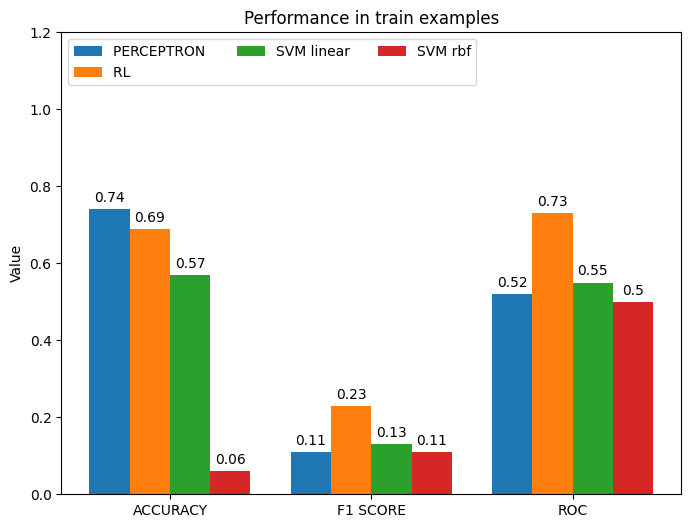

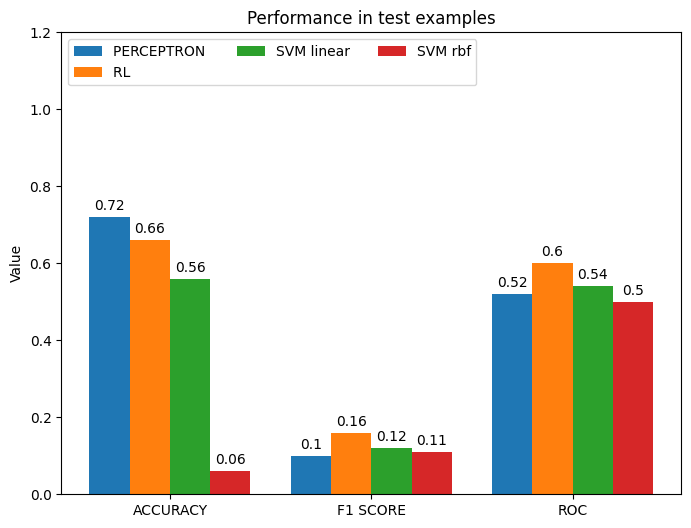

In [54]:
do_cv_and_plot_metrics(X_train, y_train, show_outputs = True)

Aquí podemos ver que los modelos lineales tiene un mejor desempeño a la hora de hacer la clasificación mientras que el modelo SVM con kernel no lineal lo hace bastante mal y esta por debajo en todas las métricas.

De momento el mejor modelo posible como podemos ver con una pequeña diferencia es la regresión logistica.

A continuación vamos a ejecutar los mismos pasos pero esta vez vamos a probar con los datos habiendoles aplicado SMOTE y realizando un oversampling para ver que valor tienen los modelos.

************  PERCEPTRON   ************
[[1015  555]
 [ 649  921]]
[[ 649  921]
 [ 440 1129]]
[[ 321 1249]
 [ 126 1443]]
[[ 566 1003]
 [ 448 1122]]
[[1059  510]
 [ 765  805]]
ACCURACY TRAIN:  0.5732836018631118
F1 TRAIN:  0.6122474702540708
ROC TRAIN:  0.5732771460017745
ACCURACY TEST:  0.5753031818725993
F1 TEST:  0.6142657335618795
ROC TEST:  0.5753296147897359

************  RL   ************
[[1095  475]
 [ 302 1268]]
[[1098  472]
 [ 337 1232]]
[[1094  476]
 [ 324 1245]]
[[1081  488]
 [ 325 1245]]
[[1081  488]
 [ 323 1247]]
ACCURACY TRAIN:  0.759142454402826
F1 TRAIN:  0.769759787662377
ROC TRAIN:  0.7591425368957676
ACCURACY TEST:  0.7445203856151195
F1 TEST:  0.7567217540601546
ROC TEST:  0.7445195325027504

************  SVM linear  ************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[ 792  778]
 [ 570 1000]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[820 750]
 [661 908]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[ 844  726]
 [ 550 1019]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[917 652]
 [680 890]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[785 784]
 [634 936]]
ACCURACY TRAIN:  0.5688231324288356
F1 TRAIN:  0.5842231504014661
ROC TRAIN:  0.5688220965012244
ACCURACY TEST:  0.5677240713197234
F1 TEST:  0.5832133098742492
ROC TEST:  0.5677269387374002

************  SVM rbf  ************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[1383  187]
 [ 292 1278]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[1290  280]
 [ 226 1343]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[1101  469]
 [ 207 1362]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[ 963  606]
 [ 143 1427]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[[1496   73]
 [ 351 1219]]
ACCURACY TRAIN:  0.8215473649143658
F1 TRAIN:  0.8284940916275929
ROC TRAIN:  0.8215466473219566
ACCURACY TEST:  0.8194426599407901
F1 TEST:  0.8257598656435681
ROC TEST:  0.81944530371489



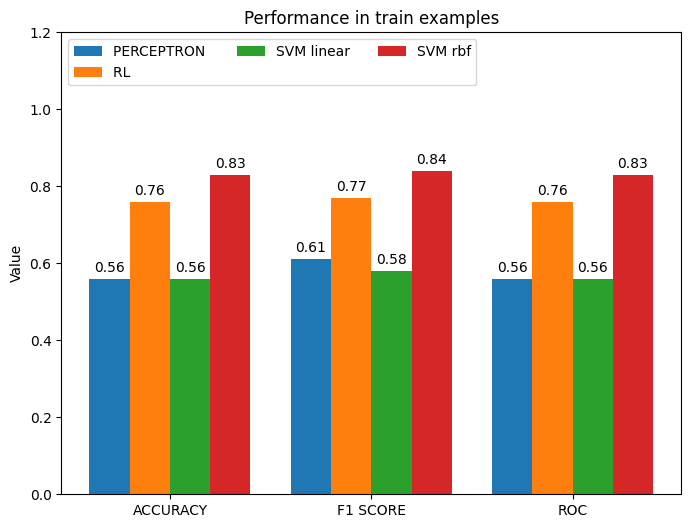

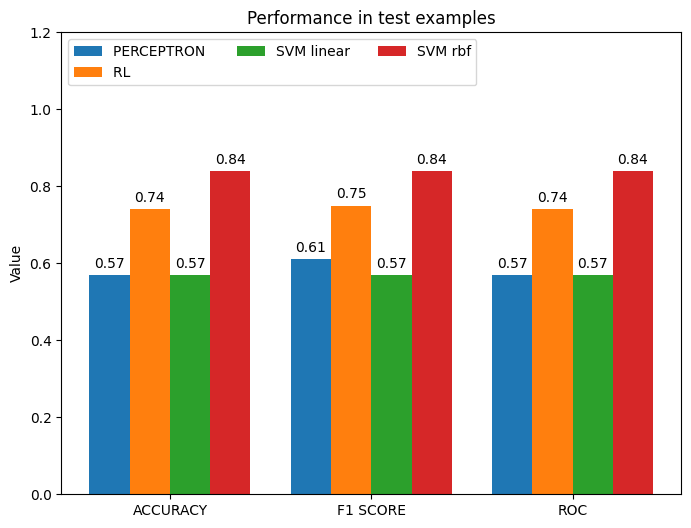

In [55]:
do_cv_and_plot_metrics(X_smote, y_smote, balanced = 1, show_outputs = True) 

Ahora podemos ver como el modelo no lineal supera a todos por una pequeña diferencia en métricas como ACCURACY y ROC pero el modelo de regresión logistica será el escogido para seguir trabajando con él debido a que en esta práctica el objetivo es poner en funcionamiento los modelos lineales una estimacion del Eout para nuestro modelo son:

E_out = 1 - ACCURACY = 1 - 0.74 = 0.26

#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos. 

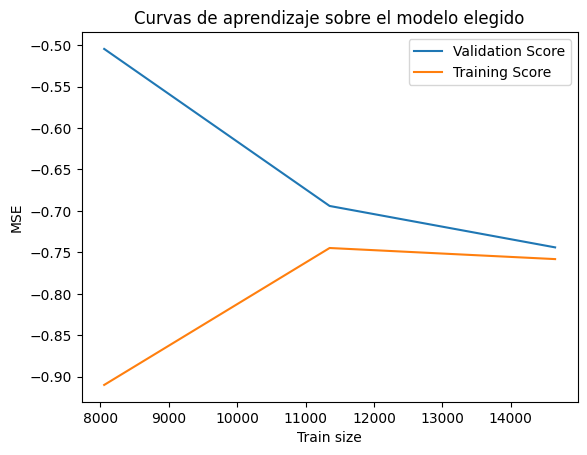

In [56]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(tol=1e-3, random_state= 0, penalty = 'l2', C = 1,  max_iter = 1000), 
                                                        X_smote, y_smote, cv=15, scoring = 'accuracy', random_state=42)
plt.title("Curvas de aprendizaje sobre el modelo elegido")
plt.plot(train_sizes,np.mean(-test_scores,axis=1), label = "Validation Score")
plt.plot(train_sizes,np.mean(-train_scores,axis=1), label = "Training Score")
plt.ylabel("MSE")
plt.xlabel("Train size")
plt.legend()

Como vemos en la gráfica conforme vamos teniendo más datos el error de validación se va acercando cada vez más al de entrenamiendo llegando a verse que con los suficientes datos tenderia a la convergencia.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos. 

Lo que haría es lo que hemos ido realizando durante la práctica tal cual. El mejor modelo lo obtendriamos a partir de la validación cruzada ya que esta nos da una estimación del posible Eout a partir del Eval.

Una vez ya elegido el mejor modelo usando la validación cruzada es coger ese modelo y entrenarlo con todos los datos disponibles, de esta forma ya si que estaría preparado para mandarselo a la empresa por lo cuál es lo que vamos a hacer a continuación.

Vamos a entrenar al modelo con todo el train set y lo que haremos será utilizar por primera vez la parte de test para estimar cuál es el E_out que podríamos decirle a la empresa que tiene.

In [63]:
model = LogisticRegression(tol=1e-3, random_state= 0, penalty = 'l2', C = 1,  max_iter = 1000)
model.fit(X_smote, y_smote)
pred = model.predict(X_test)

print("ACCURACY :", ACC(y_test, pred))
print("F1_SCORE:", F1(y_test, pred))
print("ROC-AUC:", ROC(y_test, pred))
print()

confusion_matrix(y_test, pred)


ACCURACY : 0.6858887381275441
F1_SCORE: 0.14417744916820702
ROC-AUC: 0.5768882782655318



array([[972, 416],
       [ 47,  39]])

El Eout que el diremos a la empresa que tiene es el siguiente:

In [64]:
print("E_out :", 1 - ACC(y_test, pred))

E_out : 0.31411126187245586


Esto es para tener una referencia del Eout pero si de verdad se lo tuviesemos que pasar a la empresa y el conjunto de datos que nos dieron es el total de datos que tenemos tendriamos que entrenarlo con todo sin hacer particion de test y train ya que como dicen las curvas cuantos más datos para entrenar tiene el modelo de mejor forma desempeña su trabajo.



Si entrenamos y validamos con los mismos datos, es decir, si utilizamos los mismos datos para el entrenamiento y la validación, nuestra estimación del error sería optimista.

Esto se debe a que el modelo ya ha visto los datos utilizados en la validación durante el entrenamiento el modelo podría aprender patrones específicos de los datos de entrenamiento y que tuviese un gran overfitting, lo que puede hacer que parezca que el modelo se desempeña muy bien en la validación. Para evitar esto es que usamos la validación cruzada y dividimos el conjunto en distintos folds de entrenamiento y test.

Las distintas etapas por las que hay que pasar para resolver un problema de aprendizaje automático viene muy bien representado por el proceso KDD que se basa en la idea de descubrir conocimiento útil y significativo a partir de grandes conjuntos de datos. Implica una serie de etapas interrelacionadas, que incluyen:

Selección de datos: Identificar y obtener los datos relevantes para el problema en cuestión.

Preprocesamiento de datos: Realizar operaciones de limpieza, transformación y reducción de datos para mejorar su calidad y utilidad.

Transformación de datos: Convertir los datos en una forma adecuada para su posterior análisis y modelado.

Minería de datos: Aplicar técnicas de aprendizaje automático, estadísticas y otras técnicas de análisis de datos para descubrir patrones, relaciones o conocimientos interesantes en los datos.

Evaluación de patrones: Evaluar la calidad y la importancia de los patrones descubiertos.

Presentación del conocimiento: Comunicar y presentar los resultados del análisis de datos a los usuarios finales de manera comprensible y útil.

El modelo KDD es un enfoque generalizado para descubrir conocimiento a partir de datos y puede incluir el uso de varios modelos de aprendizaje automático en diferentes etapas del proceso. Se enfoca en la identificación de patrones y relaciones ocultas en los datos para generar información útil y valiosa para la toma de decisiones y la solución de problemas.




